In [1]:
import os

import numpy as np
import torch as tc
import matplotlib.pyplot as plt

import utils

#### Train the model

In [2]:
%run -i main.py -lr 0.003 -bs 32 -n 20  # choose hyperparameters

Saving checkpoints at training_results_2023-03-15_13-56-36

Starting training...
Model: CNN with 2129092 trainable parameters
Training on CPU

epoch 1 | loss: 0.8213019967079163
train accuracy: 0.6650000214576721, test accuracy: 0.6100000143051147
epoch 2 | loss: 0.6528417468070984
train accuracy: 0.7599999904632568, test accuracy: 0.6200000047683716
epoch 3 | loss: 0.3482089638710022
train accuracy: 0.8149999976158142, test accuracy: 0.7200000286102295
epoch 4 | loss: 0.49819985032081604
train accuracy: 0.7900000214576721, test accuracy: 0.7450000047683716
epoch 5 | loss: 0.4121803641319275
train accuracy: 0.8650000095367432, test accuracy: 0.7799999713897705
epoch 6 | loss: 0.6281981468200684
train accuracy: 0.8949999809265137, test accuracy: 0.8100000023841858
epoch 7 | loss: 0.2788018584251404
train accuracy: 0.9300000071525574, test accuracy: 0.8100000023841858
epoch 8 | loss: 0.23327438533306122
train accuracy: 0.9399999976158142, test accuracy: 0.8349999785423279
epoch 9 | loss:

***Note**: for time reasons, accuracy was only computed on subsets of training and test set.* *At this point, some overfitting on the training data can still be observed.*

#### Load data and model

In [3]:
test_dataset = utils.load_pickle("dataset_test.pkl")
test_data = test_dataset.data
test_labels = test_dataset.labels

class_labels = {
    0: "no_tumor",
    1: "meningioma_tumor",
    2: "glioma_tumor",
    3: "pituitary_tumor"
}

dir_ = 'training_results_2023-03-15_13-56-36'
model = utils.load_latest_model_from_checkpoint(dir_)
print(model)

ConvNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (full1): Linear(in_features=16384, out_features=128, bias=True)
  (full2): Linear(in_features=128, out_features=64, bias=True)
  (full3): Linear(in_features=64, out_features=4, bias=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
)


In [4]:
# compute accuracy on entire test set
acc = utils.compute_accuracy(model, test_data, test_labels)
print(f"Accuracy on test set: {acc*100:.2f}%")

Accuracy on test set: 89.89%


#### Demonstration on some examples from the test set

---------------------------------------


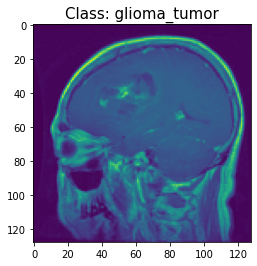

Predicted class: glioma_tumor
Correct!
---------------------------------------


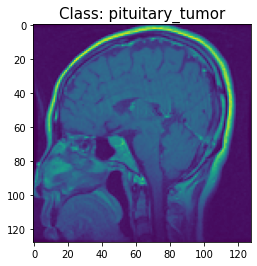

Predicted class: pituitary_tumor
Correct!
---------------------------------------


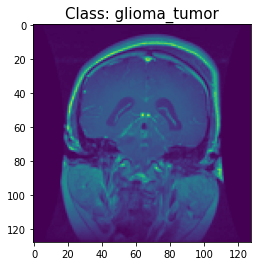

Predicted class: glioma_tumor
Correct!
---------------------------------------


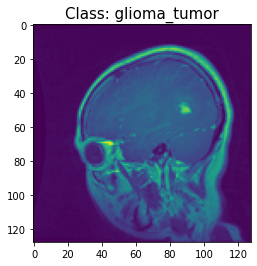

Predicted class: glioma_tumor
Correct!
---------------------------------------


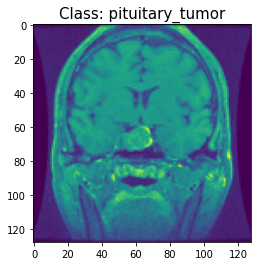

Predicted class: pituitary_tumor
Correct!
---------------------------------------


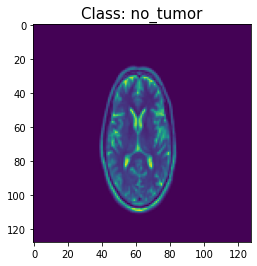

Predicted class: no_tumor
Correct!
---------------------------------------


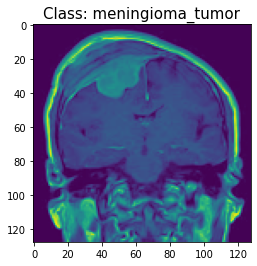

Predicted class: pituitary_tumor
False!
---------------------------------------


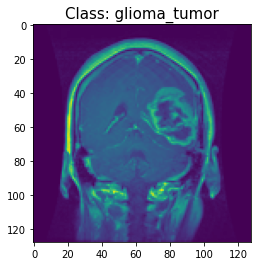

Predicted class: glioma_tumor
Correct!
---------------------------------------


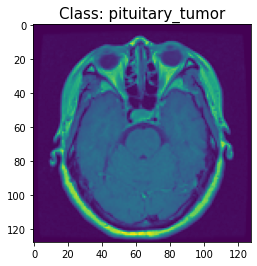

Predicted class: pituitary_tumor
Correct!
---------------------------------------


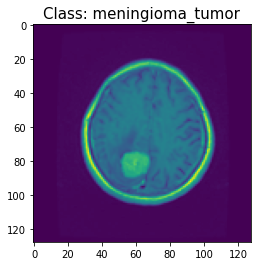

Predicted class: meningioma_tumor
Correct!


In [6]:
for i in range(10):
    print('---------------------------------------')
    idx = np.random.randint(test_data.shape[0])
    img = test_data[idx]
    label = np.argmax(test_labels[idx])
    inp = tc.tensor(img.reshape(1, 1, 128, 128))
    pred = tc.argmax(model(inp)).item()

    plt.title(f'Class: {class_labels[label]}', size=15)
    plt.imshow(np.squeeze(img))
    plt.show()
    
    print("Predicted class:", class_labels[pred])
    
    if pred == label:
        print("\033[1m\033[32mCorrect!\033[0m")
    else:
        print("\033[1m\033[31mFalse!\033[0m")
